In [1]:
# loading the subset data

import os
import pandas as pd

subset_folder = "subsets_trial5"
csv_files = [f for f in os.listdir(subset_folder) if f.endswith('.csv')]

dfs = []
for file in csv_files:
    file_path = os.path.join(subset_folder, file)
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        print(f"⚠️ UTF-8 failed for {file}, trying ISO-8859-1...")
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
df_all = df_all.loc[:, ~df_all.columns.str.startswith('Unnamed:')]
df_all = df_all[df_all['description'] != 'ERROR']
df_all['id_EXIST'] = df_all['id_EXIST'].astype('Int64')
df_all = df_all[df_all['id_EXIST'].notna()]

df_trial1 = df_all

print(df_trial1.shape)
df_trial1.head()


(809, 7)


,id_EXIST,text,path_video,target,description,label,analysis
0,220242,these men stay sparkles pressed sparkles che...,videos/6920327322679692545.mp4,1.0,A woman in a TikTok video recounts an interact...,YES,The video criticizes sexism by highlighting an...
1,220296,beaming_face_with_smiling_eyes ‘school’ pent...,videos/6935046770778967302.mp4,1.0,The video contrasts Google image search result...,YES,The video criticizes sexism by highlighting th...
2,220920,"don’t laugh at your girlfriends choice, you ar...",videos/7123342389338443009.mp4,0.0,A woman tells a joke: 'You should never laugh ...,YES,"The joke implies that women make poor choices,..."
3,220768,i guess she’s not wrong face_with_tears_of_jo...,videos/7076153533996928302.mp4,1.0,A man asks his girlfriend why she sold her car...,YES,The video perpetuates the stereotype of women ...
4,220665,"women, why do we do this? woman_facepalming_m...",videos/7039365996053794053.mp4,1.0,A woman on a bed intentionally shows she's ups...,YES,The video embodies sexism by humorously reinfo...


In [2]:
subset_folder = "subsets_trial3"
csv_files = [f for f in os.listdir(subset_folder) if f.endswith('.csv')]

dfs = []
for file in csv_files:
    file_path = os.path.join(subset_folder, file)
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        print(f"⚠️ UTF-8 failed for {file}, trying ISO-8859-1...")
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
df_all = df_all.loc[:, ~df_all.columns.str.startswith('Unnamed:')]
df_all = df_all[df_all['description'] != 'ERROR']
df_all['id_EXIST'] = df_all['id_EXIST'].astype('Int64')
df_all = df_all[df_all['id_EXIST'].notna()]

df_trial3 = df_all
df_trial3.head()

,id_EXIST,text,path_video,target,description,label,analysis,probability
0,220242,these men stay sparkles pressed sparkles che...,videos/6920327322679692545.mp4,1.0,The video features a woman recounting and sati...,NO,The video depicts sexist ideas attributed to a...,0.05
1,220296,beaming_face_with_smiling_eyes ‘school’ pent...,videos/6935046770778967302.mp4,1.0,The video contrasts Google Images search resul...,NO,The video itself does not promote or endorse s...,0.1
2,220920,"don’t laugh at your girlfriends choice, you ar...",videos/7123342389338443009.mp4,0.0,The video features a woman telling a joke advi...,NO,The video presents a lighthearted joke about r...,0.1
4,220665,"women, why do we do this? woman_facepalming_m...",videos/7039365996053794053.mp4,1.0,The video humorously depicts a common relation...,NO,The video uses gender stereotypes for comedy b...,0.3
5,220746,the struggle is real is caffeinated. most men...,videos/7067715837255470383.mp4,0.0,A woman humorously describes the difficulty of...,NO,The video makes a lighthearted observation abo...,0.1


In [3]:
# Merge the two dataframes on specified columns
merged_df = pd.merge(
    df_trial1[['id_EXIST', 'text', 'target', 'description','label','path_video','analysis']], 
    df_trial3[['id_EXIST', 'description','label','analysis']],
    on='id_EXIST',
    suffixes=('_trial1', '_trial3')
)

print("Shape of merged dataframe:", merged_df.shape)
merged_df.head()


Shape of merged dataframe: (774, 10)


,id_EXIST,text,target,description_trial1,label_trial1,path_video,analysis_trial1,description_trial3,label_trial3,analysis_trial3
0,220242,these men stay sparkles pressed sparkles che...,1.0,A woman in a TikTok video recounts an interact...,YES,videos/6920327322679692545.mp4,The video criticizes sexism by highlighting an...,The video features a woman recounting and sati...,NO,The video depicts sexist ideas attributed to a...
1,220296,beaming_face_with_smiling_eyes ‘school’ pent...,1.0,The video contrasts Google image search result...,YES,videos/6935046770778967302.mp4,The video criticizes sexism by highlighting th...,The video contrasts Google Images search resul...,NO,The video itself does not promote or endorse s...
2,220920,"don’t laugh at your girlfriends choice, you ar...",0.0,A woman tells a joke: 'You should never laugh ...,YES,videos/7123342389338443009.mp4,"The joke implies that women make poor choices,...",The video features a woman telling a joke advi...,NO,The video presents a lighthearted joke about r...
3,220665,"women, why do we do this? woman_facepalming_m...",1.0,A woman on a bed intentionally shows she's ups...,YES,videos/7039365996053794053.mp4,The video embodies sexism by humorously reinfo...,The video humorously depicts a common relation...,NO,The video uses gender stereotypes for comedy b...
4,220746,the struggle is real is caffeinated. most men...,0.0,A woman with purple hair and dark lipstick des...,YES,videos/7067715837255470383.mp4,The video embodies sexism by making a broad ge...,A woman humorously describes the difficulty of...,NO,The video makes a lighthearted observation abo...


## Agreement results

In [4]:
# Calculate agreement between trial1 and trial3 labels
agreement = (merged_df['label_trial1'] == merged_df['label_trial3']).mean()
print(f"Agreement between trial1 and trial3 labels: {agreement:.2%}")

# Show counts of label combinations
print("\nLabel combination counts:")
print(pd.crosstab(merged_df['label_trial1'], merged_df['label_trial3']))


Agreement between trial1 and trial3 labels: 56.33%

Label combination counts:
label_trial3   NO  YES
label_trial1          
NO            250    4
YES           334  186


Shape after filtering for matching labels: (436, 10)

Accuracy when both annotators agree (compared to target): 83.03%


/var/folders/b3/39sggkjn14n1xr2hwd01qgpw0000gp/T/ipykernel_51606/128445010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_labels_df['label_binary'] = (matching_labels_df['label_trial1'] == 'YES').astype(int)


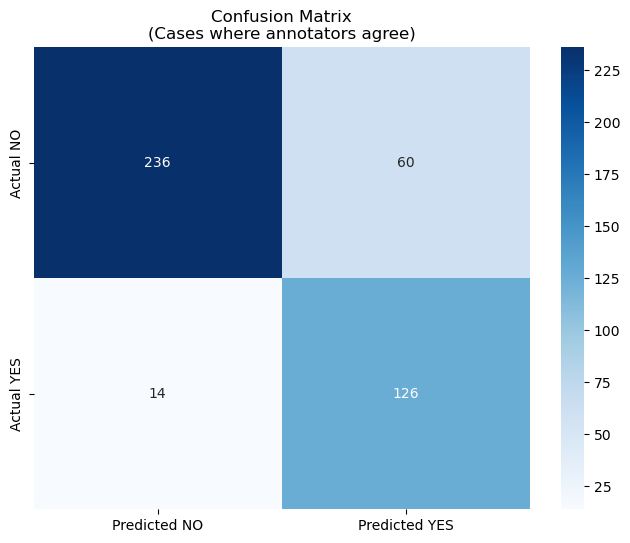

,id_EXIST,text,target,description_trial1,label_trial1,path_video,analysis_trial1,description_trial3,label_trial3,analysis_trial3,label_binary
6,220301,anniversary vibes smiling_face_with_sunglasses...,0.0,"A young man and woman, dressed up, hold hands ...",NO,videos/6937118812529577222.mp4,The video depicts a couple walking together. T...,"The video shows a young man and a young woman,...",NO,The video depicts a couple in a common social ...,0
9,220336,"""schools of feminine power harness the energy...",1.0,A woman discusses alleged Russian 'seduction s...,YES,videos/6943217682086956294.mp4,The video promotes the idea that women should ...,The video promotes the idea of 'seduction scho...,YES,The video actively promotes and endorses harmf...,1
12,220165,don’t mess with him eyes these hands are ver...,0.0,The video features clips of cats with text ove...,YES,videos/6895161636441640197.mp4,"The video uses the derogatory term ""bitches"" t...",The video features a cat with on-screen text p...,YES,The video itself normalizes and implicitly end...,1
13,220448,scientist's find a way to go sleep instantly ...,1.0,The video is a TikTok that humorously claims a...,YES,videos/6970874454901640453.mp4,The video relies on and perpetuates the sexist...,The video humorously claims via text overlay t...,YES,The video is sexist because it actively promot...,1
18,220983,wax_haven do2u puw ooo duw doo dwu 038 nlo wa...,0.0,A waitress in a themed diner sings an intentio...,NO,videos/7139239744386452742.mp4,The video depicts a themed restaurant experien...,The video shows a waitress at a 'Karen's Diner...,NO,The video depicts rude behavior within the con...,0


In [6]:
# Filter rows where labels from trial1 and trial3 match
matching_labels_df = merged_df[merged_df['label_trial1'] == merged_df['label_trial3']]
print("Shape after filtering for matching labels:", matching_labels_df.shape)

# Convert labels to binary (YES=1, NO=0) for comparison with target
matching_labels_df['label_binary'] = (matching_labels_df['label_trial1'] == 'YES').astype(int)

# Calculate accuracy comparing with target
accuracy = (matching_labels_df['label_binary'] == matching_labels_df['target']).mean()
print(f"\nAccuracy when both annotators agree (compared to target): {accuracy:.2%}")

# Create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(matching_labels_df['target'], matching_labels_df['label_binary'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted NO', 'Predicted YES'],
            yticklabels=['Actual NO', 'Actual YES'])
plt.title('Confusion Matrix\n(Cases where annotators agree)')
plt.show()

matching_labels_df.head()




## Disagreement Learning and Analysis

In [7]:
# Filter for disagreements between trial1 and trial3
disagreement_df = merged_df[merged_df['label_trial1'] != merged_df['label_trial3']]
print("Shape of disagreement cases:", disagreement_df.shape)
disagreement_df.head()

Shape of disagreement cases: (338, 10)


,id_EXIST,text,target,description_trial1,label_trial1,path_video,analysis_trial1,description_trial3,label_trial3,analysis_trial3
0,220242,these men stay sparkles pressed sparkles che...,1.0,A woman in a TikTok video recounts an interact...,YES,videos/6920327322679692545.mp4,The video criticizes sexism by highlighting an...,The video features a woman recounting and sati...,NO,The video depicts sexist ideas attributed to a...
1,220296,beaming_face_with_smiling_eyes ‘school’ pent...,1.0,The video contrasts Google image search result...,YES,videos/6935046770778967302.mp4,The video criticizes sexism by highlighting th...,The video contrasts Google Images search resul...,NO,The video itself does not promote or endorse s...
2,220920,"don’t laugh at your girlfriends choice, you ar...",0.0,A woman tells a joke: 'You should never laugh ...,YES,videos/7123342389338443009.mp4,"The joke implies that women make poor choices,...",The video features a woman telling a joke advi...,NO,The video presents a lighthearted joke about r...
3,220665,"women, why do we do this? woman_facepalming_m...",1.0,A woman on a bed intentionally shows she's ups...,YES,videos/7039365996053794053.mp4,The video embodies sexism by humorously reinfo...,The video humorously depicts a common relation...,NO,The video uses gender stereotypes for comedy b...
4,220746,the struggle is real is caffeinated. most men...,0.0,A woman with purple hair and dark lipstick des...,YES,videos/7067715837255470383.mp4,The video embodies sexism by making a broad ge...,A woman humorously describes the difficulty of...,NO,The video makes a lighthearted observation abo...


In [13]:
import os
from dotenv import load_dotenv
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Get API key from environment variable
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')

from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)
model_name = "gemini-2.5-pro-preview-05-06" # @param ["gemini-1.5-flash-latest","gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-flash-preview-04-17","gemini-2.5-pro-exp-03-25"] {"allow-input":true, isTemplate: true}

In [14]:
import time
def upload_video(video_file_name):
    video_file = client.files.upload(file=video_file_name)

    while video_file.state == "PROCESSING":
        print(f'Processing {video_file_name}...')
        time.sleep(10)
        video_file = client.files.get(name=video_file.name)

    if video_file.state == "FAILED":
        raise ValueError(f'Video processing failed for {video_file_name}')
    
    print(f'Video processing complete: {video_file.uri}')
    return video_file

In [27]:
# sexism_prompt = """
# You are an expert adjudicator tasked with resolving disagreements on whether a video exhibits sexist content. You are reviewing a case where two prior evaluators – a Skeptic Agent (cautious about false negatives, i.e., missing sexism) and an Optimist Agent (cautious about false positives, i.e., wrongly labeling as sexist) – have disagreed.

# Your primary task is to determine if the video *exhibits sexist content*. This means you must consider not only the creator's apparent intent but also the potential impact and interpretation of the content by a general audience.

# **Key Considerations for Your Analysis:**

# 1.  **Defining "Exhibits Sexist Content":**
#     *   A video exhibits sexist content if it promotes, normalizes, perpetuates, or glorifies harmful gender stereotypes, demeans individuals or groups based on gender, or depicts gender-based discrimination/inequality without sufficient countervailing context *within the video itself*.
#     *   **Critique, Satire, or Condemnation:** Videos that aim to critique, satirize, or condemn sexism *can still be classified as exhibiting sexist content* if:
#         *   The sexist elements being critiqued are presented in a gratuitous, excessive, or impactful way that might overshadow the critique.
#         *   The critique or satirical intent is unclear, ambiguous, or could be easily missed or misinterpreted by a general audience, potentially leading to the reinforcement of the sexist ideas presented.
#         *   The method of critique itself relies on or reinforces other sexist tropes.
#     *   Simply *depicting* or *quoting* sexist behavior or speech (e.g., for news reporting, documentary, or educational purposes where the problematic nature is clear) does not automatically make the video itself sexist, but the *framing and impact* are crucial.

# 2.  **Evaluating Agent Analyses:**
#     *   Do not automatically favor the agent whose conclusion aligns with your initial impression.
#     *   Critically assess *both* agents' descriptions.
#         *   The **Skeptic Agent** might highlight problematic elements or potential negative impacts that are valid, even if you disagree with their final label. Consider *why* they found it sexist.
#         *   The **Optimist Agent** might correctly identify context, intent, or counter-narratives. However, assess if this context effectively neutralizes the sexism presented or if it's a nuanced interpretation that a general viewer might miss.
#     *   Identify which agent's description more accurately captures the *full context and potential impact* of the video in light of the definition above.

# 3.  **Analyzing Video Transcript & Content:**
#     *   Ground your decision in specific evidence from the transcript and (if available/described) the video's visual and auditory elements.
#     *   Consider: Who is speaking? What is their tone? What is the power dynamic? How are different genders portrayed? Is there a clear narrative arc that contextualizes or challenges any sexist elements?

# 4.  **Justification:** Your final decision must be well-justified, explaining *why* the video does or does not exhibit sexist content, referencing the agents' inputs and the video evidence, and explicitly addressing how it handles any critique/satire.

# Please read the provided information below:

# Skeptic Agent (leans toward detecting possible false positives, i.e., flagging more content as sexist):
# Prediction: {label_trial1}
# Description: {description_trial1}

# Optimist Agent (leans toward avoiding false negatives, i.e., avoiding over-flagging content as sexist):
# Prediction: {label_trial3}
# Description: {description_trial3}

# Transcript of the Video:
# {transcript}

# Your goal is to make a fair and well-justified decision based on all the evidence and the guidelines above.

# Please provide your analysis in the following JSON format:
# {{
#     "description": "A brief summary of which agent's *description* (not necessarily their label) provides more crucial insights for the final decision, and why, considering the nuances of critique vs. endorsement.",
#     "label": "YES" or "NO" indicating whether the video exhibits sexist content based on your comprehensive analysis and the provided guidelines.",
#     "analysis": "Detailed explanation for your 'label' decision. Directly address: \n1. How the video content (transcript, described actions) aligns with or deviates from the definition of 'exhibits sexist content' provided in the guidelines. \n2. If the video contains critique, satire, or condemnation of sexism, explain whether this framing is clear and effective enough to prevent the video itself from being sexist, or if the sexist elements presented are still problematic due to their nature, presentation, or potential for misinterpretation. \n3. Justify your choice by comparing and contrasting the specific points made by the Skeptic and Optimist agents, and how they relate to your final assessment. Explicitly state which agent's reasoning (or parts thereof) you found more aligned with the guidelines and why.",
#     "probability": A number between 0 and 1 indicating your confidence in the 'label' decision (e.g., 0.95 for high confidence, 0.6 for borderline)."
# }}
# """

sexism_prompt = """
You are an expert adjudicator deciding whether the transcript exhibits sexist content.

Two agents have reviewed the transcript and disagree:
- Skeptic Agent (flags more content as sexist to avoid missing harm)
- Optimist Agent (avoids labeling content as sexist unless very clear)

Your job is to make the final call based on each agent's reasoning.

---

What you should do:
- Make a justified, thoughtful final call, giving priority to caution by favoring the Skeptic agent unless the evidence strongly supports the Optimist.

---

Here is the case you are evaluating:

Skeptic Agent:
Prediction: {label_trial1}
Description: {description_trial1}

Optimist Agent:
Prediction: {label_trial3}
Description: {description_trial3}

Transcript:
{transcript}

Please provide your analysis in the following JSON format:
{{
    "description": "A brief summary of which agent's *description* (not necessarily their label) provides more crucial insights for the final decision, and why, considering the nuances of critique vs. endorsement.",
    "label": "YES" or "NO" indicating whether the transcript exhibits sexist content based on your comprehensive analysis and the provided guidelines.",
    "analysis": "Detailed explanation for your 'label' decision. Directly address: \n1. How the transcript content aligns with or deviates from the definition of 'exhibits sexist content'. \n2. If the transcript contains critique, satire, or condemnation of sexism, explain whether this framing is clear and effective enough to prevent it from being sexist, or if the sexist elements are still problematic due to their nature, presentation, or potential for misinterpretation. \n3. Justify your choice by comparing and contrasting the specific points made by the Skeptic and Optimist agents, and how they relate to your final assessment. Explicitly state which agent's reasoning (or parts thereof) you found more aligned with the guidelines and why.",
    "probability": "A number between 0 and 1 indicating your confidence in the 'label' decision (e.g., 0.95 for high confidence, 0.6 for borderline)."
}}
"""


In [28]:
import os
import json
import pandas as pd
from tqdm import tqdm
import numpy as np

# Parameters
df = disagreement_df
num_subsets = 50  # change as needed
subset_folder = "subsets_adjudicator_trial2"
os.makedirs(subset_folder, exist_ok=True)

# Split the dataset
df_split = np.array_split(df, num_subsets)

for i, df_subset in enumerate(df_split):
    print(f"\n🚀 Processing subset {i+1}/{num_subsets} with {len(df_subset)} rows...")

    file_path = os.path.join(subset_folder, f"subset_{i+1:02d}.csv")
    print(file_path)

    if os.path.exists(file_path):

        pass
    
    else:

        descriptions = []
        labels = []
        analysis_lst = []
        prob = []

        for idx, row in tqdm(df_subset.iterrows(), total=len(df_subset)):
            try:
                path = f"/Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/{row['path_video']}"
                uploaded_video = upload_video(path)

                # Replace with your actual column names for the descriptions
                description_1 = row["analysis_trial1"]
                description_2 = row["analysis_trial3"]
                label_1 = row["label_trial1"]
                label_2 = row["label_trial3"]
                transcript = row["text"]
                

                # Fill in the prompt with the actual descriptions
                filled_prompt = sexism_prompt.format(
                    description_trial1=description_1,
                    description_trial3=description_2,
                    label_trial1=label_1,
                    label_trial3=label_2,
                    transcript=transcript
                )

                response = client.models.generate_content(
                    model=model_name,
                    contents=[filled_prompt]
                )

                result = json.loads(response.text.strip().strip("```json").strip("```"))
                description = result.get("description", "ERROR")
                label = result.get("label", "ERROR")
                analysis = result.get("analysis", "ERROR")
                probability = result.get("probability", "ERROR")
            
            except Exception as e:
                print(f"❌ Error at index {idx} (id {row['id_EXIST']}): {e}")
                description = "ERROR"
                label = "ERROR"
                analysis = "ERROR"
                probability = "ERROR"

            descriptions.append(description)
            labels.append(label)
            analysis_lst.append(analysis)
            prob.append(probability)

        # Save results for this subset
        df_subset['description'] = descriptions
        df_subset['label'] = labels
        df_subset['analysis'] = analysis_lst
        df_subset['probability'] = prob

        output_path = os.path.join(subset_folder, f"subset_{i+1:02d}.csv")
        df_subset.to_csv(output_path, index=False)
        print(f"💾 Saved results to: {output_path}")


print("\n✅ All subsets processed and saved.")

/Users/moiz.ali/miniconda3/envs/exist2025/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



🚀 Processing subset 1/50 with 7 rows...
subsets_adjudicator_trial2/subset_01.csv


  0%|          | 0/7 [00:00<?, ?it/s]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6920327322679692545.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/pqbag8qzzdfm


 14%|█▍        | 1/7 [01:28<08:53, 88.94s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6935046770778967302.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/1speolmcw31n


 29%|██▊       | 2/7 [02:38<06:27, 77.57s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7123342389338443009.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/0qffy7y8t5yz


 43%|████▎     | 3/7 [03:37<04:36, 69.03s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7039365996053794053.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/a2my3wvucise


 57%|█████▋    | 4/7 [04:53<03:34, 71.62s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7067715837255470383.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/9nfvehnqbfvt


 71%|███████▏  | 5/7 [06:04<02:22, 71.44s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7080753879641492778.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/qcx1vsajb4qk


 86%|████████▌ | 6/7 [07:03<01:07, 67.36s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6903507393443810562.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/sbw397y13b5l


100%|██████████| 7/7 [08:22<00:00, 71.75s/it]


💾 Saved results to: subsets_adjudicator_trial2/subset_01.csv

🚀 Processing subset 2/50 with 7 rows...
subsets_adjudicator_trial2/subset_02.csv


  0%|          | 0/7 [00:00<?, ?it/s]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6987866527894686981.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/wkm3spycjs71


 14%|█▍        | 1/7 [00:45<04:33, 45.55s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6931726886422793473.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/a18v4ikze2f6


 29%|██▊       | 2/7 [01:39<04:13, 50.72s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6906961576868236549.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/lddcsdho0b8r


 43%|████▎     | 3/7 [02:50<03:58, 59.63s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7004765049273306370.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/j4dxyrt0ijz5


 57%|█████▋    | 4/7 [03:52<03:02, 60.73s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6911261711215430914.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/p9tss4jda4ud


 71%|███████▏  | 5/7 [04:48<01:57, 58.85s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6956669207157148934.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/b1n2tohv6yju


 86%|████████▌ | 6/7 [06:15<01:08, 68.55s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6896249977417370881.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/v497jehuhoxo


100%|██████████| 7/7 [07:23<00:00, 63.40s/it]


💾 Saved results to: subsets_adjudicator_trial2/subset_02.csv

🚀 Processing subset 3/50 with 7 rows...
subsets_adjudicator_trial2/subset_03.csv


  0%|          | 0/7 [00:00<?, ?it/s]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6903561363256380674.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/mrzs0gjk2q25


 14%|█▍        | 1/7 [01:16<07:39, 76.55s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7118380022066334978.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/8oh2h7kh6sq7


 29%|██▊       | 2/7 [02:35<06:30, 78.05s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7041591385127963951.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/aeo4w8bytcp9


 43%|████▎     | 3/7 [04:14<05:51, 87.76s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6939789003738729729.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/gabdisws3f5z


 57%|█████▋    | 4/7 [05:17<03:53, 77.79s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6972658499599764741.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/duh8k0yb2ag0


 71%|███████▏  | 5/7 [06:19<02:24, 72.11s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6984053616776596742.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/shy0fxe2fdvr


 86%|████████▌ | 6/7 [07:22<01:08, 68.85s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6951826479202225413.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/ffnz1ayms1ry


100%|██████████| 7/7 [08:51<00:00, 75.93s/it]


💾 Saved results to: subsets_adjudicator_trial2/subset_03.csv

🚀 Processing subset 4/50 with 7 rows...
subsets_adjudicator_trial2/subset_04.csv


  0%|          | 0/7 [00:00<?, ?it/s]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6865375167904861445.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/almd6b0ah640


 14%|█▍        | 1/7 [01:39<09:59, 99.89s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6890894114741570818.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/35qv0ks3e3wo


 29%|██▊       | 2/7 [02:58<07:16, 87.24s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6784981075325160710.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/gph0j7ogp9i2


 43%|████▎     | 3/7 [04:17<05:33, 83.36s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7013588345372544261.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/b0e4jwh8qkeb


 57%|█████▋    | 4/7 [05:18<03:44, 74.68s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6789725881045683461.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/mizr1hxfrbae


 71%|███████▏  | 5/7 [06:25<02:24, 72.10s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7033460529666575622.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/kwgmmbh5vpc1


 86%|████████▌ | 6/7 [07:19<01:05, 65.69s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6928920963400748294.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/c46e0xen1r0y


100%|██████████| 7/7 [08:05<00:00, 69.29s/it]


💾 Saved results to: subsets_adjudicator_trial2/subset_04.csv

🚀 Processing subset 5/50 with 7 rows...
subsets_adjudicator_trial2/subset_05.csv


  0%|          | 0/7 [00:00<?, ?it/s]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6963381436359412997.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/ua0zliawczgw


 14%|█▍        | 1/7 [01:34<09:28, 94.80s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7001552024198221062.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/da1ny07gdya4


 29%|██▊       | 2/7 [02:42<06:34, 78.94s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7135684779080453378.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/lmp22w6bxp7v


 43%|████▎     | 3/7 [03:35<04:29, 67.26s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6938861267746573573.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/fs3febduv3yq


 57%|█████▋    | 4/7 [05:03<03:46, 75.39s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6941869151111662854.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/1469gsculyge


 71%|███████▏  | 5/7 [05:58<02:15, 67.99s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7085003283508776238.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/jfx3um8yhhvr


 86%|████████▌ | 6/7 [07:21<01:13, 73.51s/it]


KeyboardInterrupt: 

## Prompt Evaluation and Refinement

In [44]:
# Create a prompt that analyzes the descriptions and determines which is more relevant for sexism detection
sexism_prompt = """
You are an expert in analyzing potentially sexist content in videos. You are reviewing a case where two prior evaluators (one highly cautious about false negatives and one cautious about false positives) have disagreed.

Your task is to carefully consider:
- The transcript of the video,
- The analyses and label predictions from the two evaluators
in order to make a final decision on whether the video exhibits sexist content or not.

Please read the provided information below:

Skeptic Agent (leans toward detecting possible false positives):
Prediction: {label_trial1}
Description: {description_trial1}

Optimist Agent (leans toward avoiding false negatives):
Prediction: {label_trial3}
Description: {description_trial3}

Transcript of the Video:
{transcript}

Your goal is to make a fair and well-justified decision based on all the evidence.

Please provide your analysis in the following JSON format:
{{
    "description": "A brief summary of which description is more useful and why",
    "label": "YES" or "NO" based on which description aligns with the video and is better,
    "analysis": "Detailed explanation of why a certain description was chosen over the other arriving at the label conclusion",
    "probability": A number between 0 and 1 indicating confidence in the choice
}}
"""

df = disagreement_df[:5]
df.head()


,id_EXIST,text,target,description_trial1,label_trial1,path_video,description_trial3,label_trial3
0,220242,these men stay sparkles pressed sparkles che...,1.0,A woman recounts a conversation where a man ex...,YES,videos/6920327322679692545.mp4,The video features a woman recounting and sati...,NO
1,220296,beaming_face_with_smiling_eyes ‘school’ pent...,1.0,The video contrasts Google image search result...,YES,videos/6935046770778967302.mp4,The video contrasts Google Images search resul...,NO
3,220665,"women, why do we do this? woman_facepalming_m...",1.0,The video portrays a woman's internal monologu...,YES,videos/7039365996053794053.mp4,The video humorously depicts a common relation...,NO
7,220186,clean the previously detected text by removin...,1.0,A woman lip-syncs to an audio track that state...,YES,videos/6903507393443810562.mp4,The video shows a woman reacting to audio of a...,NO
8,220521,$178.00 bathing suit!? just why thinking_face...,0.0,A woman tries on an expensive swimsuit designe...,YES,videos/6987866527894686981.mp4,"The video shows two women, primarily Mikayla N...",NO


In [45]:
import json
import pandas as pd
from tqdm import tqdm

# Settings
max_iterations = 5
target_accuracy = 0.90

# Logging
prompt_versions = [sexism_prompt]
accuracy_log = []



def run_model_on_dataframe(df_input, prompt, client, model_name):
    descriptions = []
    labels = []
    analysiss = []
    prob = []

    for idx, row in tqdm(df_input.iterrows(), total=len(df_input)):
        try:
            path = f"/Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/{row['path_video']}"
            uploaded_video = upload_video(path)

            # Replace with your actual column names for the descriptions
            description_1 = row["description_trial1"]
            description_2 = row["description_trial3"]
            label_1 = row["label_trial1"]
            label_2 = row["label_trial3"]
            transcript = row["text"]
            

            # Fill in the prompt with the actual descriptions
            filled_prompt = prompt.format(
                description_trial1=description_1,
                description_trial3=description_2,
                label_trial1=label_1,
                label_trial3=label_2,
                transcript=transcript
            )

            response = client.models.generate_content(
                model=model_name,
                contents=[uploaded_video, filled_prompt]
            )
            result = json.loads(response.text.strip().strip("```json").strip("```"))

            descriptions.append(result.get("description", "ERROR"))
            labels.append(result.get("label", "ERROR"))
            analysiss.append(result.get("analysis", "ERROR"))
            prob.append(result.get("probability", "ERROR"))

        except Exception as e:
            print(f"❌ Error at index {idx} (id {row['id_EXIST']}): {e}")
            descriptions.append("ERROR")
            labels.append("ERROR")
            analysiss.append("ERROR")
            prob.append("ERROR")

    df_input["description"] = descriptions
    df_input["label"] = labels
    df_input["analysis"] = analysiss
    df_input["probability"] = prob

    return df_input


def evaluate_predictions(df_eval):
    correct = 0
    errors = []

    for _, row in df_eval.iterrows():
        if row["label_num"] == row["target"]:
            correct += 1
        else:
            errors.append({
                "id": row["id_EXIST"],
                "text": row["text"],
                "expected": row["target"],
                "predicted": row["label"],
                "description": row["description"],
                "analysis": row["analysis"],
                "probability": row["probability"],
            })

    accuracy = correct / len(df_eval)
    return accuracy, errors


def refine_prompt(current_prompt, errors, client, model_name):
    example_text = "\n\n".join([
        f"Video transcript: {e['text']}\nExpected label: {e['expected']}\nPredicted: {e['predicted']}\nGemini's description: {e['description']}\nGemini's analysis: {e['analysis']}\nGemini's label probability: {e['probability']}"
        for e in errors[:10]
    ])

    refinement_prompt = f"""
    You are helping refine a prompt that instructs an AI adjudicator to resolve disagreements between two agents analyzing whether a video contains sexist content.

    Here is the current adjudicator prompt:
    ---
    {current_prompt}
    ---

    The adjudicator was tested on real examples and made the following misclassifications:
    {example_text}

    Each example includes:
    - The transcript of the video,
    - The skeptic agent's prediction and analysis (tends to flag more content as sexist),
    - The optimist agent's prediction and analysis (tends to avoid over-flagging),
    - The adjudicator's final decision and rationale,
    - The correct label (ground truth).

    Your task is to revise the adjudicator's prompt to:
    - Make it more accurate in resolving subtle cases of sexism,
    - Encourage better use of agent analysis and video transcript,
    - Avoid leaning too heavily on one agent without justification,
    - Improve handling of borderline or ambiguous cases.

    **Important:** The revised prompt must always instruct the AI to output in the following JSON format:
    {{
        "description": "A brief summary of which description is more useful and why",
        "label": "YES" or "NO" based on which description aligns with the video and is better,
        "analysis": "Detailed explanation of why a certain description was chosen over the other arriving at the label conclusion",
        "probability": A number between 0 and 1 indicating confidence in the choice
    }}
    """

    print(example_text)

    try:
        refinement_response = client.models.generate_content(
            model=model_name,
            contents=[refinement_prompt]
        )
        new_prompt = refinement_response.text.strip()
        return new_prompt
    except Exception as e:
        print(f"⚠️ Prompt refinement failed: {e}")
        return current_prompt


# Main loop
iteration = 0
df_current = df.copy()

while iteration < max_iterations:
    print(f"\n🚀 Iteration {iteration + 1}")

    # Run model
    df_current = run_model_on_dataframe(df_current, sexism_prompt, client, model_name)
    print(df_current)
    df_current['label_num'] = df_current['label'].map({'YES': 1.0, 'NO': 0.0})

    # Evaluate
    accuracy, errors = evaluate_predictions(df_current)
    accuracy_log.append(accuracy)
    print(f"📊 Accuracy at iteration {iteration + 1}: {accuracy:.2%}")

    # Save full output for this iteration
    df_current.to_csv(f"results_iteration_{iteration+1}.csv", index=False)

    if accuracy >= target_accuracy:
        print("✅ Target accuracy reached.")
        break

    if not errors:
        print("⚠️ No errors found, but accuracy is still low. Stopping.")
        break

    # Refine prompt using incorrect examples
    sexism_prompt = refine_prompt(sexism_prompt, errors, client, model_name)
    print()
    print(f"New prompt: {sexism_prompt}")
    print()
    prompt_versions.append(sexism_prompt)

    # Create new df with only misclassified rows
    # error_ids = {e['id'] for e in errors}
    # df_current = df[df['id_EXIST'].isin(error_ids)].copy()

    iteration += 1

# Save final logs
with open("prompt_versions.txt", "w") as f:
    for i, prompt in enumerate(prompt_versions):
        f.write(f"\n\n--- Prompt Version {i+1} ---\n{prompt}\n")

with open("accuracy_log.json", "w") as f:
    json.dump(accuracy_log, f, indent=2)

print("🏁 Finished.")



🚀 Iteration 1


  0%|          | 0/5 [00:00<?, ?it/s]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6920327322679692545.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/a56rgddklmi4

You are an expert in analyzing potentially sexist content in videos. You are reviewing a case where two prior evaluators (one highly cautious about false negatives and one cautious about false positives) have disagreed.

Your task is to carefully consider:
- The transcript of the video,
- The analyses and label predictions from the two evaluators,
- And the video content itself (if available),
in order to make a final decision on whether the video exhibits sexist content or not.

Please read the provided information below:

Skeptic Agent (leans toward detecting possible false positives):
Prediction: YES
Description: A woman recounts a conversation where a man expressed dislike for beautiful women who know they are beautiful, and she critiques his statement as root

 20%|██        | 1/5 [00:37<02:28, 37.09s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6935046770778967302.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/mdtr7inkfso0

You are an expert in analyzing potentially sexist content in videos. You are reviewing a case where two prior evaluators (one highly cautious about false negatives and one cautious about false positives) have disagreed.

Your task is to carefully consider:
- The transcript of the video,
- The analyses and label predictions from the two evaluators,
- And the video content itself (if available),
in order to make a final decision on whether the video exhibits sexist content or not.

Please read the provided information below:

Skeptic Agent (leans toward detecting possible false positives):
Prediction: YES
Description: The video contrasts Google image search results for 'school boy', which shows standard images of boys in uniform, with results for 'school girl', whic

 40%|████      | 2/5 [01:07<01:40, 33.44s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7039365996053794053.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/xpthlqyjxbq8

You are an expert in analyzing potentially sexist content in videos. You are reviewing a case where two prior evaluators (one highly cautious about false negatives and one cautious about false positives) have disagreed.

Your task is to carefully consider:
- The transcript of the video,
- The analyses and label predictions from the two evaluators,
- And the video content itself (if available),
in order to make a final decision on whether the video exhibits sexist content or not.

Please read the provided information below:

Skeptic Agent (leans toward detecting possible false positives):
Prediction: YES
Description: The video portrays a woman's internal monologue as she strategically tries to get her male partner to inquire about her feelings by acting upset, a sc

 60%|██████    | 3/5 [02:01<01:25, 42.64s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6903507393443810562.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/eloyfbt6usfn

You are an expert in analyzing potentially sexist content in videos. You are reviewing a case where two prior evaluators (one highly cautious about false negatives and one cautious about false positives) have disagreed.

Your task is to carefully consider:
- The transcript of the video,
- The analyses and label predictions from the two evaluators,
- And the video content itself (if available),
in order to make a final decision on whether the video exhibits sexist content or not.

Please read the provided information below:

Skeptic Agent (leans toward detecting possible false positives):
Prediction: YES
Description: A woman lip-syncs to an audio track that states "Women can't lead. Women can't win." and then contrasts a "humiliated man" with a "nasty woman."

Opti

 80%|████████  | 4/5 [02:50<00:45, 45.29s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6987866527894686981.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/yp3i9whunfku

You are an expert in analyzing potentially sexist content in videos. You are reviewing a case where two prior evaluators (one highly cautious about false negatives and one cautious about false positives) have disagreed.

Your task is to carefully consider:
- The transcript of the video,
- The analyses and label predictions from the two evaluators,
- And the video content itself (if available),
in order to make a final decision on whether the video exhibits sexist content or not.

Please read the provided information below:

Skeptic Agent (leans toward detecting possible false positives):
Prediction: YES
Description: A woman tries on an expensive swimsuit designed to cinch the waist, demonstrating its effect with her partner's help.

Optimist Agent (leans toward av

100%|██████████| 5/5 [03:53<00:00, 46.72s/it]


   id_EXIST                                               text  target  \
0    220242  these men stay  sparkles pressed sparkles  che...     1.0   
1    220296   beaming_face_with_smiling_eyes  ‘school’ pent...     1.0   
3    220665  women, why do we do this?  woman_facepalming_m...     1.0   
7    220186   clean the previously detected text by removin...     1.0   
8    220521  $178.00 bathing suit!? just why  thinking_face...     0.0   

                                  description_trial1 label_trial1  \
0  A woman recounts a conversation where a man ex...          YES   
1  The video contrasts Google image search result...          YES   
3  The video portrays a woman's internal monologu...          YES   
7  A woman lip-syncs to an audio track that state...          YES   
8  A woman tries on an expensive swimsuit designe...          YES   

                       path_video  \
0  videos/6920327322679692545.mp4   
1  videos/6935046770778967302.mp4   
3  videos/7039365996053794053

  0%|          | 0/5 [00:00<?, ?it/s]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6920327322679692545.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/7h8cd7wnnyyj
Okay, this is a classic challenge in content moderation: distinguishing between content that *is* sexist versus content that *discusses, critiques, or satirizes* sexism. The misclassifications show the adjudicator is currently interpreting "critique of sexism" as "not sexist," while the ground truth seems to label videos as sexist if they *contain significant depictions of sexist acts or speech*, even if the intent is to critique them. This implies the ground truth might be more focused on the *presence and potential impact* of the sexist elements themselves.

Here's a revised prompt designed to address these issues:

---

You are an expert adjudicator tasked with resolving disagreements on whether a video exhibits sexist content. You are reviewing a case where two

 20%|██        | 1/5 [00:58<03:55, 58.76s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6935046770778967302.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/69d5g7ilruzp
Okay, this is a classic challenge in content moderation: distinguishing between content that *is* sexist versus content that *discusses, critiques, or satirizes* sexism. The misclassifications show the adjudicator is currently interpreting "critique of sexism" as "not sexist," while the ground truth seems to label videos as sexist if they *contain significant depictions of sexist acts or speech*, even if the intent is to critique them. This implies the ground truth might be more focused on the *presence and potential impact* of the sexist elements themselves.

Here's a revised prompt designed to address these issues:

---

You are an expert adjudicator tasked with resolving disagreements on whether a video exhibits sexist content. You are reviewing a case where two

 40%|████      | 2/5 [02:05<03:10, 63.62s/it]

❌ Error at index 1 (id 220296): Expecting ',' delimiter: line 5 column 2984 (char 3585)
Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/7039365996053794053.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/v8zx9m64c21q
Okay, this is a classic challenge in content moderation: distinguishing between content that *is* sexist versus content that *discusses, critiques, or satirizes* sexism. The misclassifications show the adjudicator is currently interpreting "critique of sexism" as "not sexist," while the ground truth seems to label videos as sexist if they *contain significant depictions of sexist acts or speech*, even if the intent is to critique them. This implies the ground truth might be more focused on the *presence and potential impact* of the sexist elements themselves.

Here's a revised prompt designed to address these issues:

---

You are an expert adjudicator tasked with resolving disa

 60%|██████    | 3/5 [02:58<01:57, 58.76s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6903507393443810562.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/rtmdmd64ofoh
Okay, this is a classic challenge in content moderation: distinguishing between content that *is* sexist versus content that *discusses, critiques, or satirizes* sexism. The misclassifications show the adjudicator is currently interpreting "critique of sexism" as "not sexist," while the ground truth seems to label videos as sexist if they *contain significant depictions of sexist acts or speech*, even if the intent is to critique them. This implies the ground truth might be more focused on the *presence and potential impact* of the sexist elements themselves.

Here's a revised prompt designed to address these issues:

---

You are an expert adjudicator tasked with resolving disagreements on whether a video exhibits sexist content. You are reviewing a case where two

 80%|████████  | 4/5 [03:45<00:53, 53.87s/it]

❌ Error at index 7 (id 220186): Expecting value: line 1 column 1 (char 0)
Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6987866527894686981.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/g8lmj555dajb
Okay, this is a classic challenge in content moderation: distinguishing between content that *is* sexist versus content that *discusses, critiques, or satirizes* sexism. The misclassifications show the adjudicator is currently interpreting "critique of sexism" as "not sexist," while the ground truth seems to label videos as sexist if they *contain significant depictions of sexist acts or speech*, even if the intent is to critique them. This implies the ground truth might be more focused on the *presence and potential impact* of the sexist elements themselves.

Here's a revised prompt designed to address these issues:

---

You are an expert adjudicator tasked with resolving disagreements on w

100%|██████████| 5/5 [04:54<00:00, 58.93s/it]


   id_EXIST                                               text  target  \
0    220242  these men stay  sparkles pressed sparkles  che...     1.0   
1    220296   beaming_face_with_smiling_eyes  ‘school’ pent...     1.0   
3    220665  women, why do we do this?  woman_facepalming_m...     1.0   
7    220186   clean the previously detected text by removin...     1.0   
8    220521  $178.00 bathing suit!? just why  thinking_face...     0.0   

                                  description_trial1 label_trial1  \
0  A woman recounts a conversation where a man ex...          YES   
1  The video contrasts Google image search result...          YES   
3  The video portrays a woman's internal monologu...          YES   
7  A woman lip-syncs to an audio track that state...          YES   
8  A woman tries on an expensive swimsuit designe...          YES   

                       path_video  \
0  videos/6920327322679692545.mp4   
1  videos/6935046770778967302.mp4   
3  videos/7039365996053794053

  0%|          | 0/5 [00:00<?, ?it/s]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6920327322679692545.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/v6r1z99lnot9
Okay, this is a good iterative refinement process! The misclassifications highlight specific areas where the adjudicator needs clearer guidance, especially around the "impact vs. intent" for critiques and the threshold for "harmful stereotypes."

Here's a revised prompt incorporating learnings from the misclassifications:

---

You are an expert adjudicator tasked with resolving disagreements on whether a video exhibits sexist content. You are reviewing a case where two prior evaluators – a Skeptic Agent and an Optimist Agent – have disagreed.

Your primary task is to determine if the video *exhibits sexist content*. This means you must consider not only the creator's apparent intent but also the *potential impact and interpretation* of the content by a general aud

 20%|██        | 1/5 [00:52<03:31, 52.97s/it]

Processing /Users/moiz.ali/Downloads/EXIST 2025 Dataset V0.3/EXIST 2025 Videos Dataset/training/videos/6935046770778967302.mp4...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/v3ncx2lajhft
Okay, this is a good iterative refinement process! The misclassifications highlight specific areas where the adjudicator needs clearer guidance, especially around the "impact vs. intent" for critiques and the threshold for "harmful stereotypes."

Here's a revised prompt incorporating learnings from the misclassifications:

---

You are an expert adjudicator tasked with resolving disagreements on whether a video exhibits sexist content. You are reviewing a case where two prior evaluators – a Skeptic Agent and an Optimist Agent – have disagreed.

Your primary task is to determine if the video *exhibits sexist content*. This means you must consider not only the creator's apparent intent but also the *potential impact and interpretation* of the content by a general aud

 20%|██        | 1/5 [01:22<05:31, 82.89s/it]


KeyboardInterrupt: 